<a href="https://colab.research.google.com/github/pscalwin/smartphoneselection/blob/main/Smart_Phone_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import scipy as stats
from IPython.display import display_html
# import the csv file directly from local dis
from google.colab import drive
drive.mount('/content/gdrive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/gdrive


In [ ]:
data =pd.read_csv('gdrive/My Drive/SmartPhoneSelection/RawData.csv')
data

,Mobiles,Observations,FiveStar,FourStar,ThreeStar,TwoStar,OneStar,Numberofreviewers,Display,Valueformoney,Batterylife
0,Moto E5 Plus,Amazon,45.0,25,9,5.0,16.0,2035,3.6,4.5,4.1
1,Moto E5 Plus,Flipkart,57.0,25,9,3.0,6.0,13795,3.8,4.6,3.8
2,Moto E5 Plus,Pricebaba,NaN,43,29,29.0,NaN,7,3.0,4.5,5.0
3,Moto E5 Plus,SmartPrix,15.0,35,35,10.0,5.0,19,3.7,3.4,4.0
4,Moto E5 Plus,91mobiles,55.0,25,9,3.0,8.0,15609,2.7,3.0,4.3
5,Moto One Power,Amazon,45.0,23,14,9.0,9.0,22,4.0,4.5,4.5
6,Moto One Power,Flipkart,62.0,24,6,2.0,6.0,79065,3.9,4.6,4.6
7,Moto One Power,Pricebaba,7.0,71,14,NaN,7.0,14,4.0,4.0,4.5
8,Moto One Power,SmartPrix,46.0,33,5,11.0,5.0,63,4.5,4.3,4.5
9,Moto One Power,91mobiles,62.0,24,6,2.0,6.0,78115,3.0,3.9,4.3


In [ ]:
print(data.isnull().sum())

Mobiles              0
Observations         0
FiveStar             1
FourStar             0
ThreeStar            0
TwoStar              3
OneStar              5
Numberofreviewers    0
Display              1
Valueformoney        1
Batterylife          1
dtype: int64


In [ ]:
data = data.interpolate()
data

,Mobiles,Observations,FiveStar,FourStar,ThreeStar,TwoStar,OneStar,Numberofreviewers,Display,Valueformoney,Batterylife
0,Moto E5 Plus,Amazon,45.0,25,9,5.0,16.000000,2035,3.6,4.50,4.1
1,Moto E5 Plus,Flipkart,57.0,25,9,3.0,6.000000,13795,3.8,4.60,3.8
2,Moto E5 Plus,Pricebaba,36.0,43,29,29.0,5.500000,7,3.0,4.50,5.0
3,Moto E5 Plus,SmartPrix,15.0,35,35,10.0,5.000000,19,3.7,3.40,4.0
4,Moto E5 Plus,91mobiles,55.0,25,9,3.0,8.000000,15609,2.7,3.00,4.3
5,Moto One Power,Amazon,45.0,23,14,9.0,9.000000,22,4.0,4.50,4.5
6,Moto One Power,Flipkart,62.0,24,6,2.0,6.000000,79065,3.9,4.60,4.6
7,Moto One Power,Pricebaba,7.0,71,14,6.5,7.000000,14,4.0,4.00,4.5
8,Moto One Power,SmartPrix,46.0,33,5,11.0,5.000000,63,4.5,4.30,4.5
9,Moto One Power,91mobiles,62.0,24,6,2.0,6.000000,78115,3.0,3.90,4.3


In [ ]:
print(data.isnull().sum())

Mobiles              0
Observations         0
FiveStar             0
FourStar             0
ThreeStar            0
TwoStar              0
OneStar              0
Numberofreviewers    0
Display              0
Valueformoney        0
Batterylife          0
dtype: int64


In [ ]:
data['Counts'] = data.groupby(['Mobiles'])['Batterylife'].transform('count')
data

,Mobiles,Observations,FiveStar,FourStar,ThreeStar,TwoStar,OneStar,Numberofreviewers,Display,Valueformoney,Batterylife,Counts
0,Moto E5 Plus,Amazon,45.0,25,9,5.0,16.000000,2035,3.6,4.50,4.1,5
1,Moto E5 Plus,Flipkart,57.0,25,9,3.0,6.000000,13795,3.8,4.60,3.8,5
2,Moto E5 Plus,Pricebaba,36.0,43,29,29.0,5.500000,7,3.0,4.50,5.0,5
3,Moto E5 Plus,SmartPrix,15.0,35,35,10.0,5.000000,19,3.7,3.40,4.0,5
4,Moto E5 Plus,91mobiles,55.0,25,9,3.0,8.000000,15609,2.7,3.00,4.3,5
5,Moto One Power,Amazon,45.0,23,14,9.0,9.000000,22,4.0,4.50,4.5,5
6,Moto One Power,Flipkart,62.0,24,6,2.0,6.000000,79065,3.9,4.60,4.6,5
7,Moto One Power,Pricebaba,7.0,71,14,6.5,7.000000,14,4.0,4.00,4.5,5
8,Moto One Power,SmartPrix,46.0,33,5,11.0,5.000000,63,4.5,4.30,4.5,5
9,Moto One Power,91mobiles,62.0,24,6,2.0,6.000000,78115,3.0,3.90,4.3,5


In [ ]:
datamean = data. groupby('Mobiles', as_index=False, sort = False)['FiveStar', 'FourStar',	'ThreeStar',	'TwoStar',	'OneStar',	'Numberofreviewers',	'Display',	'Valueformoney',	'Batterylife', 'Counts'].mean()
datamean

<ipython-input-7-564aee1c8a18>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  datamean = data. groupby('Mobiles', as_index=False, sort = False)['FiveStar', 'FourStar',	'ThreeStar',	'TwoStar',	'OneStar',	'Numberofreviewers',	'Display',	'Valueformoney',	'Batterylife', 'Counts'].mean()


,Mobiles,FiveStar,FourStar,ThreeStar,TwoStar,OneStar,Numberofreviewers,Display,Valueformoney,Batterylife,Counts
0,Moto E5 Plus,41.6,30.6,18.2,10.0,8.1,6293.0,3.36,4.00,4.24,5.0
1,Moto One Power,44.4,35.0,9.0,6.1,6.6,31455.8,3.88,4.26,4.48,5.0
2,iphone XS,57.2,22.4,9.8,7.0,4.8,306.8,3.88,4.02,3.50,5.0
3,Oneplus 6T,59.8,20.4,12.6,4.4,4.7,8075.2,4.32,4.29,4.04,5.0
4,Redmi 6 Pro,40.6,25.6,22.2,5.1,9.6,9329.8,3.84,3.88,4.24,5.0


In [ ]:
data1 = datamean.loc[datamean.index.repeat(datamean['Counts'])].reset_index(drop=True)
data1

,Mobiles,FiveStar,FourStar,ThreeStar,TwoStar,OneStar,Numberofreviewers,Display,Valueformoney,Batterylife,Counts
0,Moto E5 Plus,41.6,30.6,18.2,10.0,8.1,6293.0,3.36,4.00,4.24,5.0
1,Moto E5 Plus,41.6,30.6,18.2,10.0,8.1,6293.0,3.36,4.00,4.24,5.0
2,Moto E5 Plus,41.6,30.6,18.2,10.0,8.1,6293.0,3.36,4.00,4.24,5.0
3,Moto E5 Plus,41.6,30.6,18.2,10.0,8.1,6293.0,3.36,4.00,4.24,5.0
4,Moto E5 Plus,41.6,30.6,18.2,10.0,8.1,6293.0,3.36,4.00,4.24,5.0
5,Moto One Power,44.4,35.0,9.0,6.1,6.6,31455.8,3.88,4.26,4.48,5.0
6,Moto One Power,44.4,35.0,9.0,6.1,6.6,31455.8,3.88,4.26,4.48,5.0
7,Moto One Power,44.4,35.0,9.0,6.1,6.6,31455.8,3.88,4.26,4.48,5.0
8,Moto One Power,44.4,35.0,9.0,6.1,6.6,31455.8,3.88,4.26,4.48,5.0
9,Moto One Power,44.4,35.0,9.0,6.1,6.6,31455.8,3.88,4.26,4.48,5.0


In [ ]:
#data =pd.read_csv('gdrive/My Drive/SmartPhoneSelection/RawData.csv')
data2 = pd.DataFrame(data,columns=['FiveStar', 'FourStar',	'ThreeStar',	'TwoStar',	'OneStar',	'Numberofreviewers',	'Display',	'Valueformoney',	'Batterylife'])
#data2 = data2.interpolate()
data2

,FiveStar,FourStar,ThreeStar,TwoStar,OneStar,Numberofreviewers,Display,Valueformoney,Batterylife
0,45.0,25,9,5.0,16.000000,2035,3.6,4.50,4.1
1,57.0,25,9,3.0,6.000000,13795,3.8,4.60,3.8
2,36.0,43,29,29.0,5.500000,7,3.0,4.50,5.0
3,15.0,35,35,10.0,5.000000,19,3.7,3.40,4.0
4,55.0,25,9,3.0,8.000000,15609,2.7,3.00,4.3
5,45.0,23,14,9.0,9.000000,22,4.0,4.50,4.5
6,62.0,24,6,2.0,6.000000,79065,3.9,4.60,4.6
7,7.0,71,14,6.5,7.000000,14,4.0,4.00,4.5
8,46.0,33,5,11.0,5.000000,63,4.5,4.30,4.5
9,62.0,24,6,2.0,6.000000,78115,3.0,3.90,4.3


In [ ]:
residual = data2[['FiveStar', 'FourStar',	'ThreeStar',	'TwoStar',	'OneStar',	'Numberofreviewers',	'Display',	'Valueformoney',	'Batterylife']]-data1[['FiveStar', 'FourStar',	'ThreeStar',	'TwoStar',	'OneStar',	'Numberofreviewers',	'Display',	'Valueformoney',	'Batterylife']]
residual

,FiveStar,FourStar,ThreeStar,TwoStar,OneStar,Numberofreviewers,Display,Valueformoney,Batterylife
0,3.4,-5.6,-9.2,-5.0,7.900000,-4258.0,0.24,0.50,-0.14
1,15.4,-5.6,-9.2,-7.0,-2.100000,7502.0,0.44,0.60,-0.44
2,-5.6,12.4,10.8,19.0,-2.600000,-6286.0,-0.36,0.50,0.76
3,-26.6,4.4,16.8,0.0,-3.100000,-6274.0,0.34,-0.60,-0.24
4,13.4,-5.6,-9.2,-7.0,-0.100000,9316.0,-0.66,-1.00,0.06
5,0.6,-12.0,5.0,2.9,2.400000,-31433.8,0.12,0.24,0.02
6,17.6,-11.0,-3.0,-4.1,-0.600000,47609.2,0.02,0.34,0.12
7,-37.4,36.0,5.0,0.4,0.400000,-31441.8,0.12,-0.26,0.02
8,1.6,-2.0,-4.0,4.9,-1.600000,-31392.8,0.62,0.04,0.02
9,17.6,-11.0,-3.0,-4.1,-0.600000,46659.2,-0.88,-0.36,-0.18


In [ ]:
data3 = pd.DataFrame(data,columns=['Mobiles'])
data3 = data3.join(residual)
data3

,Mobiles,FiveStar,FourStar,ThreeStar,TwoStar,OneStar,Numberofreviewers,Display,Valueformoney,Batterylife
0,Moto E5 Plus,3.4,-5.6,-9.2,-5.0,7.900000,-4258.0,0.24,0.50,-0.14
1,Moto E5 Plus,15.4,-5.6,-9.2,-7.0,-2.100000,7502.0,0.44,0.60,-0.44
2,Moto E5 Plus,-5.6,12.4,10.8,19.0,-2.600000,-6286.0,-0.36,0.50,0.76
3,Moto E5 Plus,-26.6,4.4,16.8,0.0,-3.100000,-6274.0,0.34,-0.60,-0.24
4,Moto E5 Plus,13.4,-5.6,-9.2,-7.0,-0.100000,9316.0,-0.66,-1.00,0.06
5,Moto One Power,0.6,-12.0,5.0,2.9,2.400000,-31433.8,0.12,0.24,0.02
6,Moto One Power,17.6,-11.0,-3.0,-4.1,-0.600000,47609.2,0.02,0.34,0.12
7,Moto One Power,-37.4,36.0,5.0,0.4,0.400000,-31441.8,0.12,-0.26,0.02
8,Moto One Power,1.6,-2.0,-4.0,4.9,-1.600000,-31392.8,0.62,0.04,0.02
9,Moto One Power,17.6,-11.0,-3.0,-4.1,-0.600000,46659.2,-0.88,-0.36,-0.18


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='rainbow')

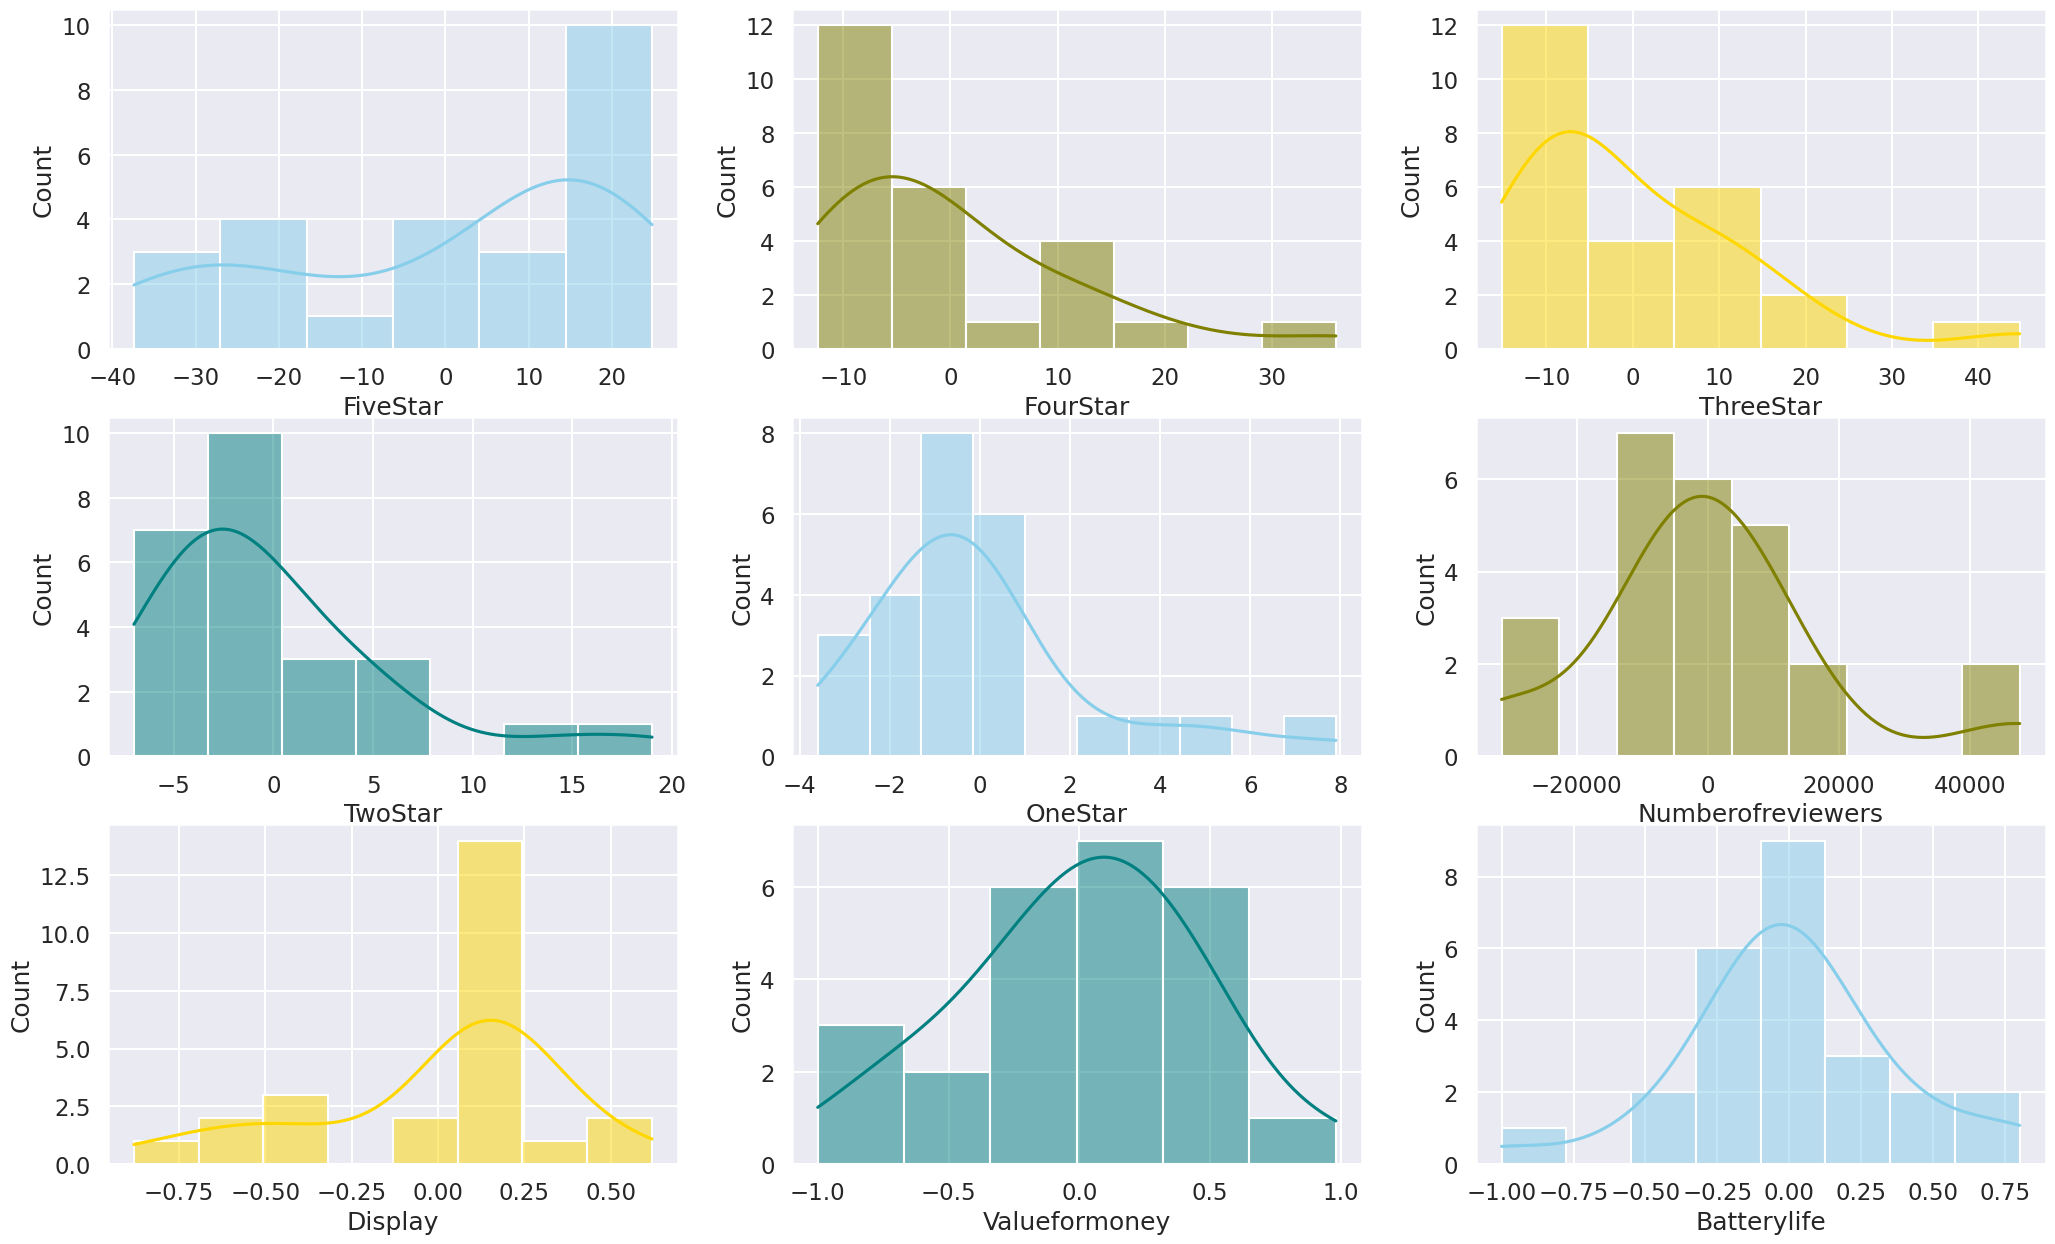

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(25, 15))

sns.histplot(data3, x="FiveStar", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data3, x="FourStar", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data3, x="ThreeStar", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data3, x="TwoStar", kde=True, color="teal", ax=axs[1, 0])
sns.histplot(data3, x="OneStar", kde=True, color="skyblue", ax=axs[1, 1])
sns.histplot(data3, x="Numberofreviewers", kde=True, color="olive", ax=axs[1, 2])
sns.histplot(data3, x="Display", kde=True, color="gold", ax=axs[2, 0])
sns.histplot(data3, x="Valueformoney", kde=True, color="teal", ax=axs[2, 1])
sns.histplot(data3, x="Batterylife", kde=True, color="skyblue", ax=axs[2, 2])

plt.show()

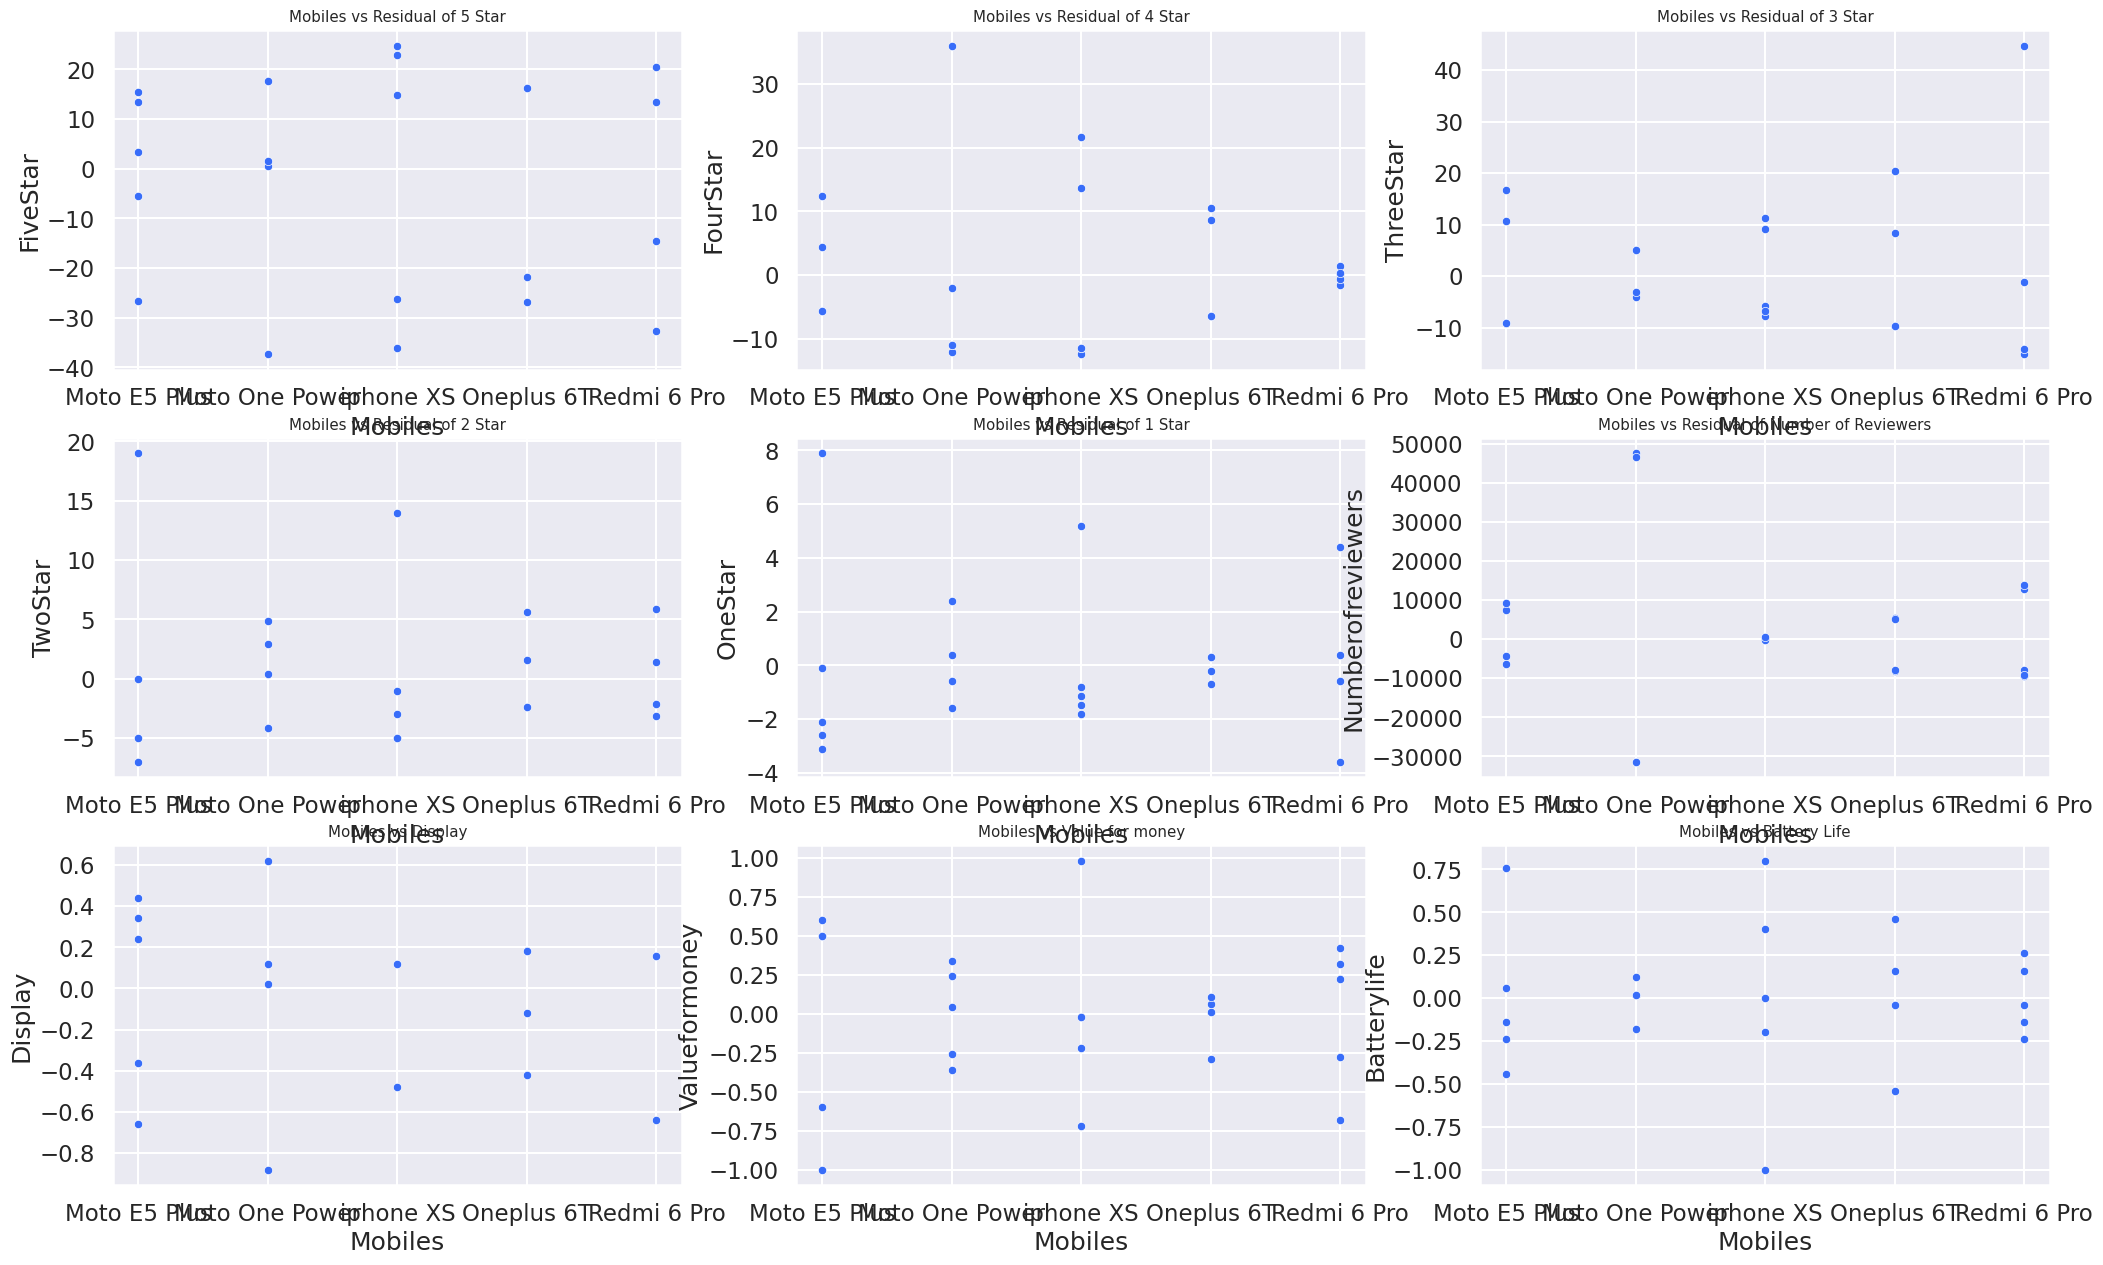

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(25,15))
sns.set(font_scale=0.9)
sns.scatterplot(data=data3, x="Mobiles", y = "FiveStar", ax=ax[0,0])
sns.scatterplot(data=data3, x="Mobiles", y = "FourStar", ax=ax[0,1])
sns.scatterplot(data=data3, x="Mobiles", y = "ThreeStar", ax=ax[0,2])
sns.scatterplot(data=data3, x="Mobiles", y = "TwoStar", ax=ax[1,0])
sns.scatterplot(data=data3, x="Mobiles", y = "OneStar", ax=ax[1,1])
sns.scatterplot(data=data3, x="Mobiles", y = "Numberofreviewers", ax=ax[1,2])
sns.scatterplot(data=data3, x="Mobiles", y = "Display", ax=ax[2,0])
sns.scatterplot(data=data3, x="Mobiles", y = "Valueformoney", ax=ax[2,1])
sns.scatterplot(data=data3, x="Mobiles", y = "Batterylife", ax=ax[2,2])
ax[0,0].set_title("Mobiles vs Residual of 5 Star")
ax[0,1].set_title("Mobiles vs Residual of 4 Star")
ax[0,2].set_title("Mobiles vs Residual of 3 Star")
ax[1,0].set_title("Mobiles vs Residual of 2 Star")
ax[1,1].set_title("Mobiles vs Residual of 1 Star")
ax[1,2].set_title("Mobiles vs Residual of Number of Reviewers")
ax[2,0].set_title("Mobiles vs Display")
ax[2,1].set_title("Mobiles vs Value for money")
ax[2,2].set_title("Mobiles vs Battery Life")
plt.show()


In [ ]:
from sklearn.preprocessing import FunctionTransformer #MinMaxScaler #StandardScaler
scaler = FunctionTransformer(np.log10, validate=True) #MinMaxScaler() #StandardScaler()
data4 = pd.DataFrame(data,columns=['FiveStar', 'FourStar',	'ThreeStar',	'TwoStar',	'OneStar',	'Numberofreviewers'])
data4[['FiveStar','FourStar','ThreeStar','TwoStar','OneStar','Numberofreviewers']]= scaler.fit_transform(data4[['FiveStar','FourStar','ThreeStar','TwoStar','OneStar','Numberofreviewers']])
data4

,FiveStar,FourStar,ThreeStar,TwoStar,OneStar,Numberofreviewers
0,1.653213,1.397940,0.954243,0.698970,1.204120,3.308564
1,1.755875,1.397940,0.954243,0.477121,0.778151,4.139722
2,1.556303,1.633468,1.462398,1.462398,0.740363,0.845098
3,1.176091,1.544068,1.544068,1.000000,0.698970,1.278754
4,1.740363,1.397940,0.954243,0.477121,0.903090,4.193375
5,1.653213,1.361728,1.146128,0.954243,0.954243,1.342423
6,1.792392,1.380211,0.778151,0.301030,0.778151,4.897984
7,0.845098,1.851258,1.146128,0.812913,0.845098,1.146128
8,1.662758,1.518514,0.698970,1.041393,0.698970,1.799341
9,1.792392,1.380211,0.778151,0.301030,0.778151,4.892734


In [ ]:
from sklearn.preprocessing import FunctionTransformer #MinMaxScaler #StandardScaler
scaler = FunctionTransformer(np.log2, validate=True)
data5 = pd.DataFrame(data,columns=['Display',	'Valueformoney',	'Batterylife'])
data5[['Display',	'Valueformoney',	'Batterylife']]= scaler.fit_transform(data5[['Display',	'Valueformoney',	'Batterylife']])
data5 =data5 * 2
data5

,Display,Valueformoney,Batterylife
0,3.695994,4.339850,4.071248
1,3.851999,4.403268,3.851999
2,3.169925,4.339850,4.643856
3,3.775051,3.531069,4.000000
4,2.865919,3.169925,4.208673
5,4.000000,4.339850,4.339850
6,3.926948,4.403268,4.403268
7,4.000000,4.000000,4.339850
8,4.339850,4.208673,4.339850
9,3.169925,3.926948,4.208673


In [ ]:
data6 = data4.join(data5)
data7 = data6.join(data['Mobiles'])
data8 =pd.DataFrame(data7,columns=['Mobiles','FiveStar', 'FourStar',	'ThreeStar',	'TwoStar',	'OneStar',	'Numberofreviewers',	'Display',	'Valueformoney',	'Batterylife'])
data8
datamissed = data8.copy()

In [ ]:
data8['Counts'] = data8.groupby(['Mobiles'])['Batterylife'].transform('count')
data8

,Mobiles,FiveStar,FourStar,ThreeStar,TwoStar,OneStar,Numberofreviewers,Display,Valueformoney,Batterylife,Counts
0,Moto E5 Plus,1.653213,1.397940,0.954243,0.698970,1.204120,3.308564,3.695994,4.339850,4.071248,5
1,Moto E5 Plus,1.755875,1.397940,0.954243,0.477121,0.778151,4.139722,3.851999,4.403268,3.851999,5
2,Moto E5 Plus,1.556303,1.633468,1.462398,1.462398,0.740363,0.845098,3.169925,4.339850,4.643856,5
3,Moto E5 Plus,1.176091,1.544068,1.544068,1.000000,0.698970,1.278754,3.775051,3.531069,4.000000,5
4,Moto E5 Plus,1.740363,1.397940,0.954243,0.477121,0.903090,4.193375,2.865919,3.169925,4.208673,5
5,Moto One Power,1.653213,1.361728,1.146128,0.954243,0.954243,1.342423,4.000000,4.339850,4.339850,5
6,Moto One Power,1.792392,1.380211,0.778151,0.301030,0.778151,4.897984,3.926948,4.403268,4.403268,5
7,Moto One Power,0.845098,1.851258,1.146128,0.812913,0.845098,1.146128,4.000000,4.000000,4.339850,5
8,Moto One Power,1.662758,1.518514,0.698970,1.041393,0.698970,1.799341,4.339850,4.208673,4.339850,5
9,Moto One Power,1.792392,1.380211,0.778151,0.301030,0.778151,4.892734,3.169925,3.926948,4.208673,5


In [ ]:
data9 = data8.copy()
data9

,Mobiles,FiveStar,FourStar,ThreeStar,TwoStar,OneStar,Numberofreviewers,Display,Valueformoney,Batterylife,Counts
0,Moto E5 Plus,1.653213,1.397940,0.954243,0.698970,1.204120,3.308564,3.695994,4.339850,4.071248,5
1,Moto E5 Plus,1.755875,1.397940,0.954243,0.477121,0.778151,4.139722,3.851999,4.403268,3.851999,5
2,Moto E5 Plus,1.556303,1.633468,1.462398,1.462398,0.740363,0.845098,3.169925,4.339850,4.643856,5
3,Moto E5 Plus,1.176091,1.544068,1.544068,1.000000,0.698970,1.278754,3.775051,3.531069,4.000000,5
4,Moto E5 Plus,1.740363,1.397940,0.954243,0.477121,0.903090,4.193375,2.865919,3.169925,4.208673,5
5,Moto One Power,1.653213,1.361728,1.146128,0.954243,0.954243,1.342423,4.000000,4.339850,4.339850,5
6,Moto One Power,1.792392,1.380211,0.778151,0.301030,0.778151,4.897984,3.926948,4.403268,4.403268,5
7,Moto One Power,0.845098,1.851258,1.146128,0.812913,0.845098,1.146128,4.000000,4.000000,4.339850,5
8,Moto One Power,1.662758,1.518514,0.698970,1.041393,0.698970,1.799341,4.339850,4.208673,4.339850,5
9,Moto One Power,1.792392,1.380211,0.778151,0.301030,0.778151,4.892734,3.169925,3.926948,4.208673,5


In [ ]:
data8 = data8. groupby('Mobiles', as_index=False,sort = False)['FiveStar', 'FourStar',	'ThreeStar',	'TwoStar',	'OneStar',	'Numberofreviewers',	'Display',	'Valueformoney',	'Batterylife','Counts'].mean()
data8

<ipython-input-20-7f93a2aaf0f3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data8 = data8. groupby('Mobiles', as_index=False,sort = False)['FiveStar', 'FourStar',	'ThreeStar',	'TwoStar',	'OneStar',	'Numberofreviewers',	'Display',	'Valueformoney',	'Batterylife','Counts'].mean()


,Mobiles,FiveStar,FourStar,ThreeStar,TwoStar,OneStar,Numberofreviewers,Display,Valueformoney,Batterylife,Counts
0,Moto E5 Plus,1.576369,1.474271,1.173839,0.823122,0.864939,2.753103,3.471777,3.956792,4.155155,5.0
1,Moto One Power,1.549170,1.498385,0.909506,0.682122,0.810923,2.815722,3.887345,4.175748,4.326298,5.0
2,iphone XS,1.697563,1.256508,0.796237,0.660898,0.633266,2.025299,3.906214,3.988157,3.567824,5.0
3,Oneplus 6T,1.748148,1.278429,0.854419,0.536248,0.670437,3.159586,4.217455,4.200144,4.019068,5.0
4,Redmi 6 Pro,1.513636,1.407892,1.159914,0.621916,0.966553,3.015383,3.871229,3.894567,4.165377,5.0


In [ ]:
data10 = data8.loc[data8.index.repeat(data8['Counts'])].reset_index(drop=True)
data10

,Mobiles,FiveStar,FourStar,ThreeStar,TwoStar,OneStar,Numberofreviewers,Display,Valueformoney,Batterylife,Counts
0,Moto E5 Plus,1.576369,1.474271,1.173839,0.823122,0.864939,2.753103,3.471777,3.956792,4.155155,5.0
1,Moto E5 Plus,1.576369,1.474271,1.173839,0.823122,0.864939,2.753103,3.471777,3.956792,4.155155,5.0
2,Moto E5 Plus,1.576369,1.474271,1.173839,0.823122,0.864939,2.753103,3.471777,3.956792,4.155155,5.0
3,Moto E5 Plus,1.576369,1.474271,1.173839,0.823122,0.864939,2.753103,3.471777,3.956792,4.155155,5.0
4,Moto E5 Plus,1.576369,1.474271,1.173839,0.823122,0.864939,2.753103,3.471777,3.956792,4.155155,5.0
5,Moto One Power,1.549170,1.498385,0.909506,0.682122,0.810923,2.815722,3.887345,4.175748,4.326298,5.0
6,Moto One Power,1.549170,1.498385,0.909506,0.682122,0.810923,2.815722,3.887345,4.175748,4.326298,5.0
7,Moto One Power,1.549170,1.498385,0.909506,0.682122,0.810923,2.815722,3.887345,4.175748,4.326298,5.0
8,Moto One Power,1.549170,1.498385,0.909506,0.682122,0.810923,2.815722,3.887345,4.175748,4.326298,5.0
9,Moto One Power,1.549170,1.498385,0.909506,0.682122,0.810923,2.815722,3.887345,4.175748,4.326298,5.0


In [ ]:
residual2 = data9[['FiveStar', 'FourStar',	'ThreeStar',	'TwoStar',	'OneStar',	'Numberofreviewers',	'Display',	'Valueformoney',	'Batterylife']]-data10[['FiveStar', 'FourStar',	'ThreeStar',	'TwoStar',	'OneStar',	'Numberofreviewers',	'Display',	'Valueformoney',	'Batterylife']]
residual2

,FiveStar,FourStar,ThreeStar,TwoStar,OneStar,Numberofreviewers,Display,Valueformoney,Batterylife
0,0.076844,-0.076331,-0.219596,-0.124152,0.339181,0.555462,0.224216,0.383058,-0.083907
1,0.179506,-0.076331,-0.219596,-0.346001,-0.086788,1.386619,0.380221,0.446475,-0.303156
2,-0.020066,0.159197,0.288559,0.639276,-0.124576,-1.908005,-0.301852,0.383058,0.488701
3,-0.400278,0.069797,0.370229,0.176878,-0.165969,-1.474349,0.303273,-0.425723,-0.155155
4,0.163994,-0.076331,-0.219596,-0.346001,0.038151,1.440273,-0.605859,-0.786867,0.053518
5,0.104042,-0.136657,0.236622,0.272121,0.143320,-1.473299,0.112655,0.164102,0.013552
6,0.243221,-0.118173,-0.131354,-0.381092,-0.032771,2.082262,0.039604,0.227520,0.076970
7,-0.704072,0.352874,0.236622,0.130792,0.034175,-1.669594,0.112655,-0.175748,0.013552
8,0.113587,0.020129,-0.210536,0.359271,-0.111953,-1.016381,0.452505,0.032925,0.013552
9,0.243221,-0.118173,-0.131354,-0.381092,-0.032771,2.077012,-0.717420,-0.248800,-0.117625


In [ ]:
data10 = pd.DataFrame(data10,columns=['Mobiles'])
data10 = data10.join(residual2)
data10

,Mobiles,FiveStar,FourStar,ThreeStar,TwoStar,OneStar,Numberofreviewers,Display,Valueformoney,Batterylife
0,Moto E5 Plus,0.076844,-0.076331,-0.219596,-0.124152,0.339181,0.555462,0.224216,0.383058,-0.083907
1,Moto E5 Plus,0.179506,-0.076331,-0.219596,-0.346001,-0.086788,1.386619,0.380221,0.446475,-0.303156
2,Moto E5 Plus,-0.020066,0.159197,0.288559,0.639276,-0.124576,-1.908005,-0.301852,0.383058,0.488701
3,Moto E5 Plus,-0.400278,0.069797,0.370229,0.176878,-0.165969,-1.474349,0.303273,-0.425723,-0.155155
4,Moto E5 Plus,0.163994,-0.076331,-0.219596,-0.346001,0.038151,1.440273,-0.605859,-0.786867,0.053518
5,Moto One Power,0.104042,-0.136657,0.236622,0.272121,0.143320,-1.473299,0.112655,0.164102,0.013552
6,Moto One Power,0.243221,-0.118173,-0.131354,-0.381092,-0.032771,2.082262,0.039604,0.227520,0.076970
7,Moto One Power,-0.704072,0.352874,0.236622,0.130792,0.034175,-1.669594,0.112655,-0.175748,0.013552
8,Moto One Power,0.113587,0.020129,-0.210536,0.359271,-0.111953,-1.016381,0.452505,0.032925,0.013552
9,Moto One Power,0.243221,-0.118173,-0.131354,-0.381092,-0.032771,2.077012,-0.717420,-0.248800,-0.117625


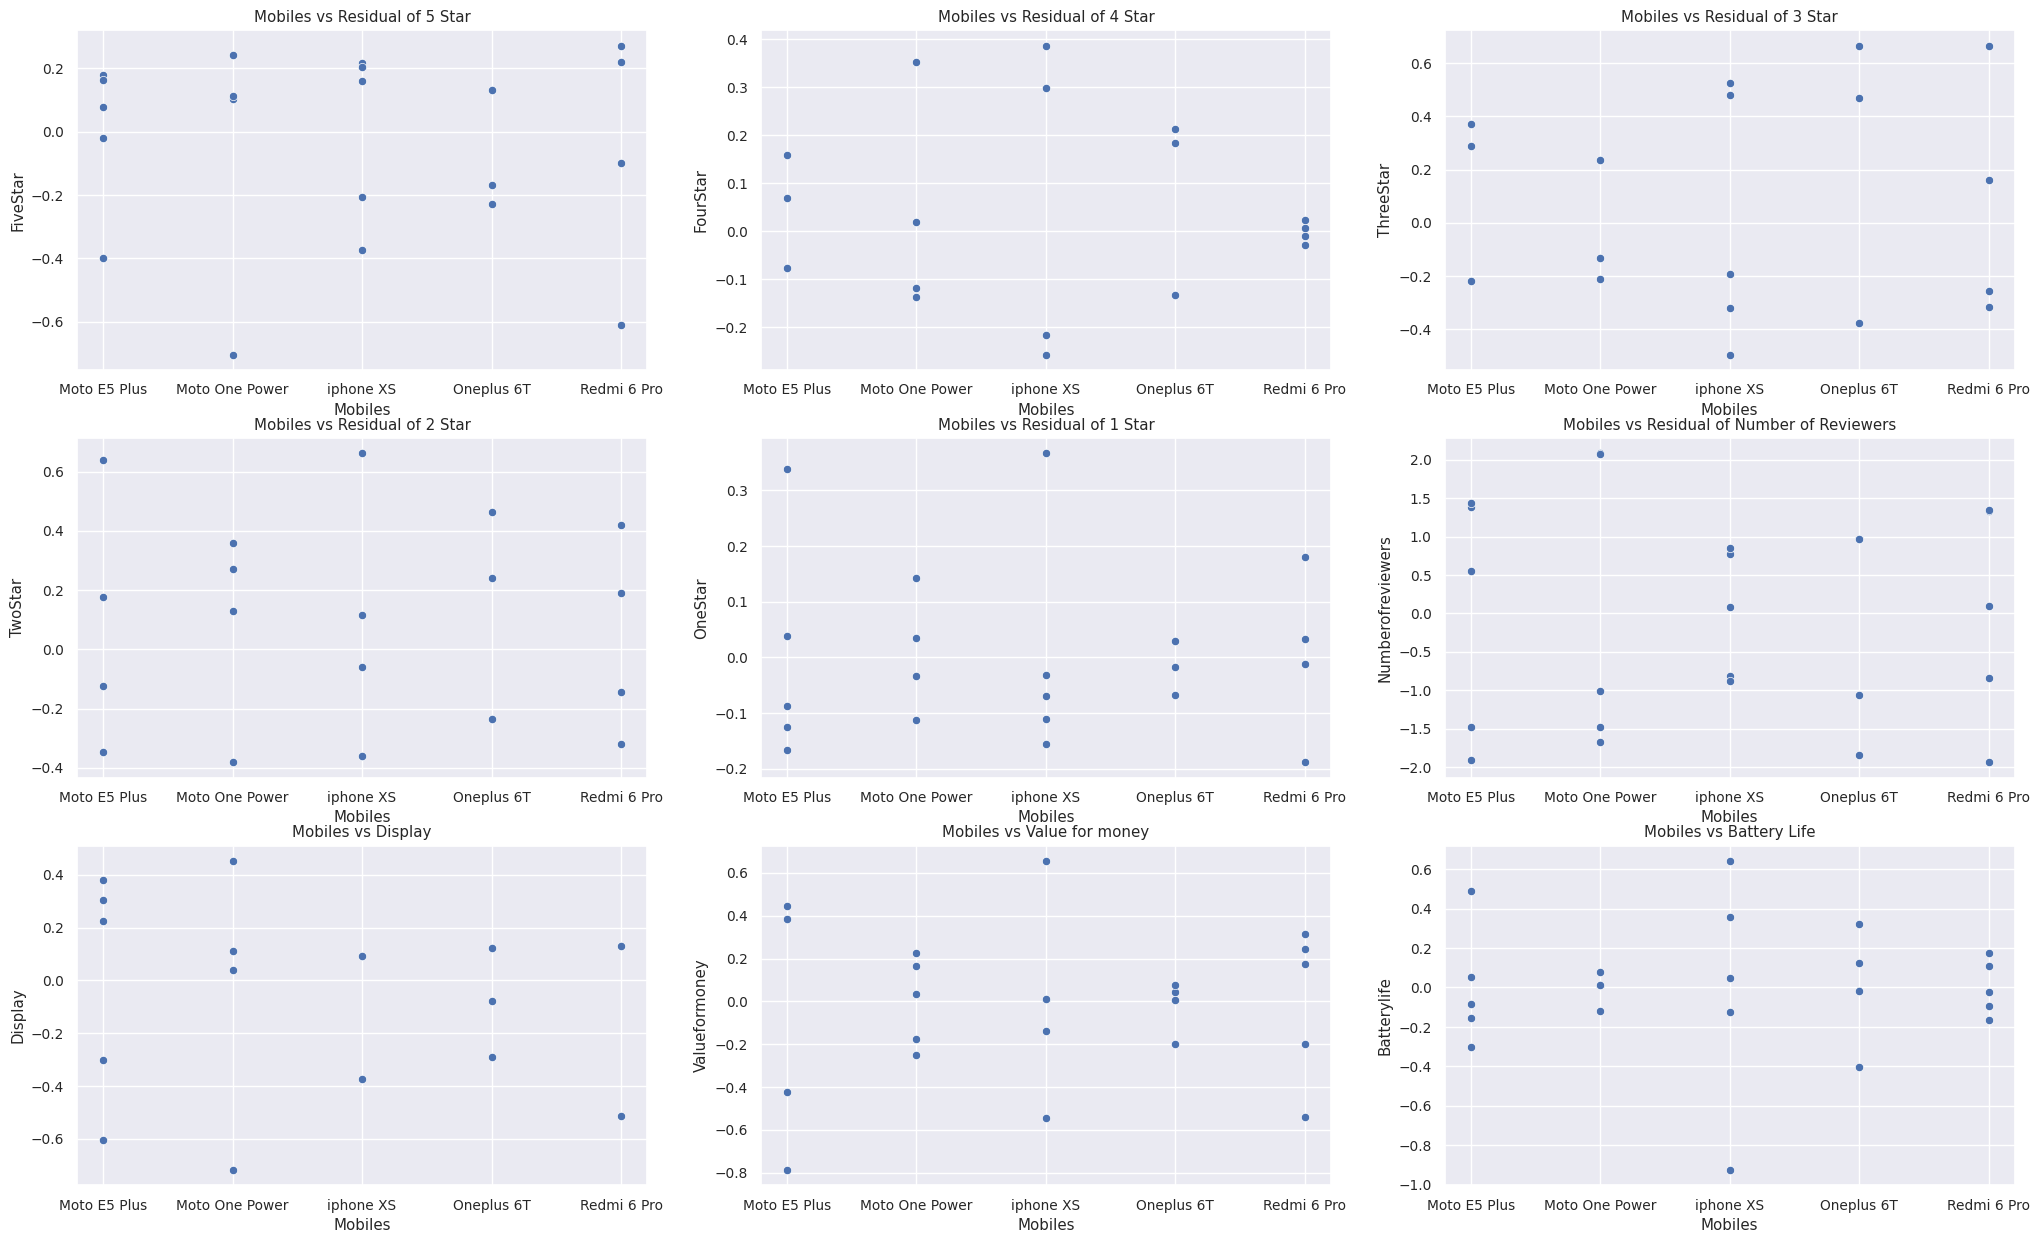

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(25,15))
sns.set(font_scale=0.9)
sns.scatterplot(data=data10, x="Mobiles", y = "FiveStar", ax=ax[0,0])
sns.scatterplot(data=data10, x="Mobiles", y = "FourStar", ax=ax[0,1])
sns.scatterplot(data=data10, x="Mobiles", y = "ThreeStar", ax=ax[0,2])
sns.scatterplot(data=data10, x="Mobiles", y = "TwoStar", ax=ax[1,0])
sns.scatterplot(data=data10, x="Mobiles", y = "OneStar", ax=ax[1,1])
sns.scatterplot(data=data10, x="Mobiles", y = "Numberofreviewers", ax=ax[1,2])
sns.scatterplot(data=data10, x="Mobiles", y = "Display", ax=ax[2,0])
sns.scatterplot(data=data10, x="Mobiles", y = "Valueformoney", ax=ax[2,1])
sns.scatterplot(data=data10, x="Mobiles", y = "Batterylife", ax=ax[2,2])
ax[0,0].set_title("Mobiles vs Residual of 5 Star")
ax[0,1].set_title("Mobiles vs Residual of 4 Star")
ax[0,2].set_title("Mobiles vs Residual of 3 Star")
ax[1,0].set_title("Mobiles vs Residual of 2 Star")
ax[1,1].set_title("Mobiles vs Residual of 1 Star")
ax[1,2].set_title("Mobiles vs Residual of Number of Reviewers")
ax[2,0].set_title("Mobiles vs Display")
ax[2,1].set_title("Mobiles vs Value for money")
ax[2,2].set_title("Mobiles vs Battery Life")
plt.show()

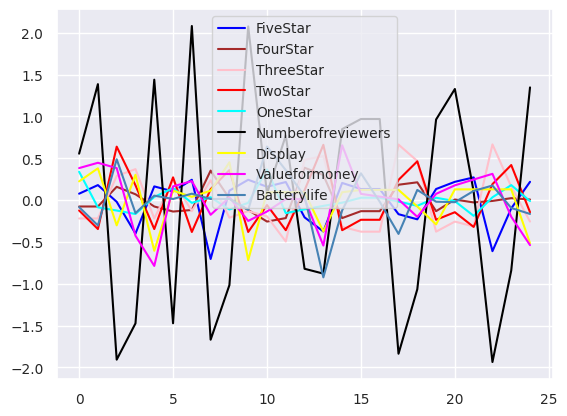

In [ ]:
plt.plot(data10['FiveStar'], color='blue',  marker='', markerfacecolor='blue', markersize=12, label = "FiveStar")
plt.plot(data10['FourStar'], color='brown',  marker='', markerfacecolor='brown', markersize=12, label = "FourStar")
plt.plot(data10['ThreeStar'], color='pink',  marker='', markerfacecolor='pink', markersize=12, label = "ThreeStar")
plt.plot(data10['TwoStar'], color='red',  marker='', markerfacecolor='red', markersize=12, label = "TwoStar")
plt.plot(data10['OneStar'], color='cyan',  marker='', markerfacecolor='cyan', markersize=12, label = "OneStar")
plt.plot(data10['Numberofreviewers'], color='black',  marker='', markerfacecolor='black', markersize=12, label = "Numberofreviewers")
plt.plot(data10['Display'], color='yellow',  marker='', markerfacecolor='yellow', markersize=12, label = "Display")
plt.plot(data10['Valueformoney'], color='magenta',  marker='', markerfacecolor='magenta', markersize=12, label = "Valueformoney")
plt.plot(data10['Batterylife'], color='steelblue',  marker='', markerfacecolor='steelblue', markersize=12, label = "Batterylife")
plt.rcParams['figure.figsize'] = [15, 7]
#display plot
plt.legend()
plt.show()

In [ ]:
data11 =pd.DataFrame(data10, columns = ['FiveStar', 'FourStar',	'ThreeStar',	'TwoStar',	'OneStar',	'Numberofreviewers',	'Display',	'Valueformoney',	'Batterylife'])
data11

,FiveStar,FourStar,ThreeStar,TwoStar,OneStar,Numberofreviewers,Display,Valueformoney,Batterylife
0,0.076844,-0.076331,-0.219596,-0.124152,0.339181,0.555462,0.224216,0.383058,-0.083907
1,0.179506,-0.076331,-0.219596,-0.346001,-0.086788,1.386619,0.380221,0.446475,-0.303156
2,-0.020066,0.159197,0.288559,0.639276,-0.124576,-1.908005,-0.301852,0.383058,0.488701
3,-0.400278,0.069797,0.370229,0.176878,-0.165969,-1.474349,0.303273,-0.425723,-0.155155
4,0.163994,-0.076331,-0.219596,-0.346001,0.038151,1.440273,-0.605859,-0.786867,0.053518
5,0.104042,-0.136657,0.236622,0.272121,0.143320,-1.473299,0.112655,0.164102,0.013552
6,0.243221,-0.118173,-0.131354,-0.381092,-0.032771,2.082262,0.039604,0.227520,0.076970
7,-0.704072,0.352874,0.236622,0.130792,0.034175,-1.669594,0.112655,-0.175748,0.013552
8,0.113587,0.020129,-0.210536,0.359271,-0.111953,-1.016381,0.452505,0.032925,0.013552
9,0.243221,-0.118173,-0.131354,-0.381092,-0.032771,2.077012,-0.717420,-0.248800,-0.117625


In [ ]:
# Calculate Mahalanobis Distance
def mahalanobis(x=None, data=None, cov=None):

    x_mu = x - np.mean(data11)
    if not cov:
        cov = np.cov(data11.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

#create new column in dataframe that contains Mahalanobis distance for each row
data11['mahalanobis'] = mahalanobis(x=data11, data=data11[['FiveStar', 'FourStar',	'ThreeStar',	'TwoStar',	'OneStar',	'Numberofreviewers',	'Display',	'Valueformoney',	'Batterylife']])

#display first five rows of dataframe
data11

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,FiveStar,FourStar,ThreeStar,TwoStar,OneStar,Numberofreviewers,Display,Valueformoney,Batterylife,mahalanobis
0,0.076844,-0.076331,-0.219596,-0.124152,0.339181,0.555462,0.224216,0.383058,-0.083907,9.996541
1,0.179506,-0.076331,-0.219596,-0.346001,-0.086788,1.386619,0.380221,0.446475,-0.303156,6.692122
2,-0.020066,0.159197,0.288559,0.639276,-0.124576,-1.908005,-0.301852,0.383058,0.488701,16.505305
3,-0.400278,0.069797,0.370229,0.176878,-0.165969,-1.474349,0.303273,-0.425723,-0.155155,10.352243
4,0.163994,-0.076331,-0.219596,-0.346001,0.038151,1.440273,-0.605859,-0.786867,0.053518,8.952387
5,0.104042,-0.136657,0.236622,0.272121,0.143320,-1.473299,0.112655,0.164102,0.013552,8.362161
6,0.243221,-0.118173,-0.131354,-0.381092,-0.032771,2.082262,0.039604,0.227520,0.076970,8.448770
7,-0.704072,0.352874,0.236622,0.130792,0.034175,-1.669594,0.112655,-0.175748,0.013552,16.065860
8,0.113587,0.020129,-0.210536,0.359271,-0.111953,-1.016381,0.452505,0.032925,0.013552,9.629954
9,0.243221,-0.118173,-0.131354,-0.381092,-0.032771,2.077012,-0.717420,-0.248800,-0.117625,7.926126


In [ ]:
from scipy.stats import chi2

#calculate p-value for each mahalanobis distance
data11['p'] = 1 - chi2.cdf(data11['mahalanobis'], 3)

#display p-values for first five rows in dataframe
data11

,FiveStar,FourStar,ThreeStar,TwoStar,OneStar,Numberofreviewers,Display,Valueformoney,Batterylife,mahalanobis,p
0,0.076844,-0.076331,-0.219596,-0.124152,0.339181,0.555462,0.224216,0.383058,-0.083907,9.996541,0.018596
1,0.179506,-0.076331,-0.219596,-0.346001,-0.086788,1.386619,0.380221,0.446475,-0.303156,6.692122,0.082386
2,-0.020066,0.159197,0.288559,0.639276,-0.124576,-1.908005,-0.301852,0.383058,0.488701,16.505305,0.000893
3,-0.400278,0.069797,0.370229,0.176878,-0.165969,-1.474349,0.303273,-0.425723,-0.155155,10.352243,0.015797
4,0.163994,-0.076331,-0.219596,-0.346001,0.038151,1.440273,-0.605859,-0.786867,0.053518,8.952387,0.029931
5,0.104042,-0.136657,0.236622,0.272121,0.143320,-1.473299,0.112655,0.164102,0.013552,8.362161,0.039091
6,0.243221,-0.118173,-0.131354,-0.381092,-0.032771,2.082262,0.039604,0.227520,0.076970,8.448770,0.037593
7,-0.704072,0.352874,0.236622,0.130792,0.034175,-1.669594,0.112655,-0.175748,0.013552,16.065860,0.001099
8,0.113587,0.020129,-0.210536,0.359271,-0.111953,-1.016381,0.452505,0.032925,0.013552,9.629954,0.021988
9,0.243221,-0.118173,-0.131354,-0.381092,-0.032771,2.077012,-0.717420,-0.248800,-0.117625,7.926126,0.047563


In [ ]:
outlierIndexes = np.where(data11['p'] < 0.01 )

print('--- Index of Outliers ----')
print(outlierIndexes)

--- Index of Outliers ----
(array([ 2,  7, 10, 12, 13, 22]),)


In [ ]:
datamissed.drop([2,  7,  10,  12, 13, 17, 22], axis=0, inplace=True)
datamissed = datamissed.reset_index()
datamissed.drop('index', axis=1, inplace=True)
datamissed

,Mobiles,FiveStar,FourStar,ThreeStar,TwoStar,OneStar,Numberofreviewers,Display,Valueformoney,Batterylife
0,Moto E5 Plus,1.653213,1.397940,0.954243,0.698970,1.204120,3.308564,3.695994,4.339850,4.071248
1,Moto E5 Plus,1.755875,1.397940,0.954243,0.477121,0.778151,4.139722,3.851999,4.403268,3.851999
2,Moto E5 Plus,1.176091,1.544068,1.544068,1.000000,0.698970,1.278754,3.775051,3.531069,4.000000
3,Moto E5 Plus,1.740363,1.397940,0.954243,0.477121,0.903090,4.193375,2.865919,3.169925,4.208673
4,Moto One Power,1.653213,1.361728,1.146128,0.954243,0.954243,1.342423,4.000000,4.339850,4.339850
5,Moto One Power,1.792392,1.380211,0.778151,0.301030,0.778151,4.897984,3.926948,4.403268,4.403268
6,Moto One Power,1.662758,1.518514,0.698970,1.041393,0.698970,1.799341,4.339850,4.208673,4.339850
7,Moto One Power,1.792392,1.380211,0.778151,0.301030,0.778151,4.892734,3.169925,3.926948,4.208673
8,iphone XS,1.913814,1.041393,0.301030,0.301030,0.477121,2.797960,4.000000,4.000000,3.926948
9,iphone XS,1.903090,1.041393,0.477121,0.301030,0.602060,2.874482,4.000000,4.643856,3.444932


In [ ]:
data10 = pd.DataFrame(datamissed,columns=['Mobiles'])
data10

,Mobiles
0,Moto E5 Plus
1,Moto E5 Plus
2,Moto E5 Plus
3,Moto E5 Plus
4,Moto One Power
5,Moto One Power
6,Moto One Power
7,Moto One Power
8,iphone XS
9,iphone XS


In [ ]:
def intify(s):
    u = np.unique(s)
    return s.map({k: i for i, k in enumerate(u)})

data10 = data10.apply(intify)
#data10 = data10.sort_values('Mobiles')
data10

,Mobiles
0,0
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,4
9,4


In [ ]:
data11 = pd.DataFrame(datamissed,columns=['FiveStar', 'FourStar',	'ThreeStar',	'TwoStar',	'OneStar',	'Numberofreviewers',	'Display',	'Valueformoney',	'Batterylife'])
data11 = data10.join(data11)
data11

,Mobiles,FiveStar,FourStar,ThreeStar,TwoStar,OneStar,Numberofreviewers,Display,Valueformoney,Batterylife
0,0,1.653213,1.397940,0.954243,0.698970,1.204120,3.308564,3.695994,4.339850,4.071248
1,0,1.755875,1.397940,0.954243,0.477121,0.778151,4.139722,3.851999,4.403268,3.851999
2,0,1.176091,1.544068,1.544068,1.000000,0.698970,1.278754,3.775051,3.531069,4.000000
3,0,1.740363,1.397940,0.954243,0.477121,0.903090,4.193375,2.865919,3.169925,4.208673
4,1,1.653213,1.361728,1.146128,0.954243,0.954243,1.342423,4.000000,4.339850,4.339850
5,1,1.792392,1.380211,0.778151,0.301030,0.778151,4.897984,3.926948,4.403268,4.403268
6,1,1.662758,1.518514,0.698970,1.041393,0.698970,1.799341,4.339850,4.208673,4.339850
7,1,1.792392,1.380211,0.778151,0.301030,0.778151,4.892734,3.169925,3.926948,4.208673
8,4,1.913814,1.041393,0.301030,0.301030,0.477121,2.797960,4.000000,4.000000,3.926948
9,4,1.903090,1.041393,0.477121,0.301030,0.602060,2.874482,4.000000,4.643856,3.444932


In [ ]:
data11
datatoresi = data11.copy()
datatoresi

,Mobiles,FiveStar,FourStar,ThreeStar,TwoStar,OneStar,Numberofreviewers,Display,Valueformoney,Batterylife
0,0,1.653213,1.397940,0.954243,0.698970,1.204120,3.308564,3.695994,4.339850,4.071248
1,0,1.755875,1.397940,0.954243,0.477121,0.778151,4.139722,3.851999,4.403268,3.851999
2,0,1.176091,1.544068,1.544068,1.000000,0.698970,1.278754,3.775051,3.531069,4.000000
3,0,1.740363,1.397940,0.954243,0.477121,0.903090,4.193375,2.865919,3.169925,4.208673
4,1,1.653213,1.361728,1.146128,0.954243,0.954243,1.342423,4.000000,4.339850,4.339850
5,1,1.792392,1.380211,0.778151,0.301030,0.778151,4.897984,3.926948,4.403268,4.403268
6,1,1.662758,1.518514,0.698970,1.041393,0.698970,1.799341,4.339850,4.208673,4.339850
7,1,1.792392,1.380211,0.778151,0.301030,0.778151,4.892734,3.169925,3.926948,4.208673
8,4,1.913814,1.041393,0.301030,0.301030,0.477121,2.797960,4.000000,4.000000,3.926948
9,4,1.903090,1.041393,0.477121,0.301030,0.602060,2.874482,4.000000,4.643856,3.444932


In [ ]:
data11['Counts'] = data11.groupby(['Mobiles'])['Batterylife'].transform('count')
data11

,Mobiles,FiveStar,FourStar,ThreeStar,TwoStar,OneStar,Numberofreviewers,Display,Valueformoney,Batterylife,Counts
0,0,1.653213,1.397940,0.954243,0.698970,1.204120,3.308564,3.695994,4.339850,4.071248,4
1,0,1.755875,1.397940,0.954243,0.477121,0.778151,4.139722,3.851999,4.403268,3.851999,4
2,0,1.176091,1.544068,1.544068,1.000000,0.698970,1.278754,3.775051,3.531069,4.000000,4
3,0,1.740363,1.397940,0.954243,0.477121,0.903090,4.193375,2.865919,3.169925,4.208673,4
4,1,1.653213,1.361728,1.146128,0.954243,0.954243,1.342423,4.000000,4.339850,4.339850,4
5,1,1.792392,1.380211,0.778151,0.301030,0.778151,4.897984,3.926948,4.403268,4.403268,4
6,1,1.662758,1.518514,0.698970,1.041393,0.698970,1.799341,4.339850,4.208673,4.339850,4
7,1,1.792392,1.380211,0.778151,0.301030,0.778151,4.892734,3.169925,3.926948,4.208673,4
8,4,1.913814,1.041393,0.301030,0.301030,0.477121,2.797960,4.000000,4.000000,3.926948,2
9,4,1.903090,1.041393,0.477121,0.301030,0.602060,2.874482,4.000000,4.643856,3.444932,2


In [ ]:
data11 = data11. groupby('Mobiles', as_index=False,sort = False)['FiveStar', 'FourStar',	'ThreeStar',	'TwoStar',	'OneStar',	'Numberofreviewers',	'Display',	'Valueformoney',	'Batterylife','Counts'].mean()
data11
datarrepeat =data11.copy()

<ipython-input-36-2168b5c0eb63>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data11 = data11. groupby('Mobiles', as_index=False,sort = False)['FiveStar', 'FourStar',	'ThreeStar',	'TwoStar',	'OneStar',	'Numberofreviewers',	'Display',	'Valueformoney',	'Batterylife','Counts'].mean()


In [ ]:
from pandas.core.groupby.ops import DataFrame
datagm = DataFrame (data11,columns=['FiveStar', 'FourStar',	'ThreeStar',	'TwoStar',	'OneStar',	'Numberofreviewers',	'Display',	'Valueformoney',	'Batterylife']).transpose()
#datagm = DataFrame(datagm,columns=['0','1','2','3','4','5','6'])
#del datagm[datagm.columns[6]]

#df1 = pd.DataFrame({ 'aa': [0,0,0,0,0,0,0],'bb': [0,0,0,0,0,0,0],'cc': [0,0,0,0,0,0,0],'dd': [0,0,0,0,0,0,0]})
#datagm = datagm.join(df1).transpose()
datagm.reset_index(drop=True, inplace=True)
datagm

,0,1,2,3,4
0,1.581385,1.725188,1.908452,1.790239,1.666273
1,1.434472,1.410166,1.041393,1.232436,1.410380
2,1.101699,0.850350,0.389076,0.688396,0.993374
3,0.663303,0.649424,0.301030,0.475772,0.574166
4,0.896083,0.802379,0.539591,0.674743,0.958191
5,3.230104,3.233120,2.836221,3.618927,3.499433
6,3.547241,3.859181,4.000000,4.186857,3.839036
7,3.861028,4.219685,4.321928,4.198011,3.816041
8,4.032980,4.322910,3.685940,4.120157,4.121758


In [ ]:
datac = pd.DataFrame({'1':[-.333,-.333,-.333,.5,.5],'2':[0,0,1,-1,0],'3':[-.5,-.5,0,0,1]})
#datac.join(data8[['Counts']])
datac


,1,2,3
0,-0.333,0,-0.5
1,-0.333,0,-0.5
2,-0.333,1,0.0
3,0.500,-1,0.0
4,0.500,0,1.0


In [ ]:
dataxc = datac.pow(2).transpose()
datacounts = DataFrame(data11,columns=['Counts']).transpose()
dataxc = [dataxc.iloc[:,0]/4,dataxc.iloc[:,1]/4, dataxc.iloc[:,2]/2,dataxc.iloc[:,3]/4,dataxc.iloc[:,4]/4]
dataxc = pd.DataFrame(dataxc)
dataxc = pd.DataFrame(dataxc.sum()).transpose()
#print(dataxc)
#print(datacounts)
dataxc

,1,2,3
0,0.235889,0.75,0.375


In [ ]:
mul = datagm.values.dot(datac.values)
mul
mult = mul.transpose()
mult
hcontnum = mul.dot(mult)
hcontnum = pd.DataFrame(hcontnum)
print(pd.DataFrame(mul))
print(pd.DataFrame(mult))
print(pd.DataFrame(hcontnum))

          0         1         2
0 -0.008348  0.118213  0.012986
1  0.027360 -0.191044 -0.011939
2  0.061291 -0.299320  0.017350
3 -0.012412 -0.174743 -0.082197
4  0.071195 -0.135152  0.108960
5  0.462465 -0.782707  0.267821
6  0.214608 -0.186857  0.135825
7 -0.123053  0.123917 -0.224315
8  0.111028 -0.434217 -0.056187
          0         1         2         3         4         5         6  \
0 -0.008348  0.027360  0.061291 -0.012412  0.071195  0.462465  0.214608   
1  0.118213 -0.191044 -0.299320 -0.174743 -0.135152 -0.782707 -0.186857   
2  0.012986 -0.011939  0.017350 -0.082197  0.108960  0.267821  0.135825   

          7         8  
0 -0.123053  0.111028  
1  0.123917 -0.434217  
2 -0.224315 -0.056187  
          0         1         2         3         4         5         6  \
0  0.014213 -0.022967 -0.035670 -0.021621 -0.015156 -0.092909 -0.022117   
1 -0.022967  0.037389  0.058653  0.034025  0.026467  0.158987  0.039948   
2 -0.035670  0.058653  0.093650  0.050117  0.046708  0.267

In [ ]:
hc1 = hcontnum/dataxc.iloc[0,0]
hc1 = pd.DataFrame(hc1)
hc1

,0,1,2,3,4,5,6,7,8
0,0.060252,-0.097365,-0.151215,-0.091656,-0.064251,-0.393867,-0.093759,0.054106,-0.224625
1,-0.097365,0.158502,0.248647,0.144242,0.112201,0.673990,0.169351,-0.103279,0.367389
2,-0.151215,0.248647,0.397009,0.212461,0.198007,1.133038,0.302854,-0.205710,0.575695
3,-0.091656,0.144242,0.212461,0.158741,0.058404,0.462158,0.079799,-0.007157,0.335397
4,-0.064251,0.112201,0.198007,0.058404,0.149253,0.711740,0.234571,-0.211752,0.256340
5,-0.393867,0.673990,1.133038,0.462158,0.711740,3.807858,1.194967,-0.907100,1.594662
6,-0.093759,0.169351,0.302854,0.079799,0.234571,1.194967,0.421472,-0.339272,0.412619
7,0.054106,-0.103279,-0.205710,-0.007157,-0.211752,-0.907100,-0.339272,0.342597,-0.232591
8,-0.224625,0.367389,0.575695,0.335397,0.256340,1.594662,0.412619,-0.232591,0.864935


In [ ]:
hc2 = hcontnum/dataxc.iloc[0,1]
hc2 = pd.DataFrame(hc2)
hc2

,0,1,2,3,4,5,6,7,8
0,0.018950,-0.030623,-0.047560,-0.028828,-0.020208,-0.123879,-0.029489,0.017017,-0.070649
1,-0.030623,0.049852,0.078204,0.045367,0.035289,0.211983,0.053264,-0.032483,0.115551
2,-0.047560,0.078204,0.124867,0.066823,0.062277,0.356362,0.095253,-0.064700,0.181067
3,-0.028828,0.045367,0.066823,0.049927,0.018369,0.145357,0.025098,-0.002251,0.105489
4,-0.020208,0.035289,0.062277,0.018369,0.046943,0.223855,0.073777,-0.066600,0.080624
5,-0.123879,0.211983,0.356362,0.145357,0.223855,1.197642,0.375840,-0.285300,0.501551
6,-0.029489,0.053264,0.095253,0.025098,0.073777,0.375840,0.132561,-0.106708,0.129776
7,0.017017,-0.032483,-0.064700,-0.002251,-0.066600,-0.285300,-0.106708,0.107753,-0.073154
8,-0.070649,0.115551,0.181067,0.105489,0.080624,0.501551,0.129776,-0.073154,0.272038


In [ ]:
hc3 = hcontnum/dataxc.iloc[0,2]
hc3 = pd.DataFrame(hc3)
hc3

,0,1,2,3,4,5,6,7,8
0,0.037901,-0.061246,-0.095120,-0.057655,-0.040416,-0.247757,-0.058978,0.034034,-0.141298
1,-0.061246,0.099704,0.156408,0.090734,0.070579,0.423965,0.106528,-0.064966,0.231101
2,-0.095120,0.156408,0.249734,0.133646,0.124554,0.712723,0.190507,-0.129399,0.362133
3,-0.057655,0.090734,0.133646,0.099854,0.036738,0.290715,0.050197,-0.004502,0.210977
4,-0.040416,0.070579,0.124554,0.036738,0.093886,0.447711,0.147554,-0.133200,0.161248
5,-0.247757,0.423965,0.712723,0.290715,0.447711,2.395285,0.751679,-0.570600,1.003102
6,-0.058978,0.106528,0.190507,0.050197,0.147554,0.751679,0.265121,-0.213415,0.259553
7,0.034034,-0.064966,-0.129399,-0.004502,-0.133200,-0.570600,-0.213415,0.215506,-0.146308
8,-0.141298,0.231101,0.362133,0.210977,0.161248,1.003102,0.259553,-0.146308,0.544076


In [ ]:
datarepe = datarrepeat.loc[datarrepeat.index.repeat(datarrepeat['Counts'])].reset_index(drop=True)
datarepe

,Mobiles,FiveStar,FourStar,ThreeStar,TwoStar,OneStar,Numberofreviewers,Display,Valueformoney,Batterylife,Counts
0,0,1.581385,1.434472,1.101699,0.663303,0.896083,3.230104,3.547241,3.861028,4.032980,4.0
1,0,1.581385,1.434472,1.101699,0.663303,0.896083,3.230104,3.547241,3.861028,4.032980,4.0
2,0,1.581385,1.434472,1.101699,0.663303,0.896083,3.230104,3.547241,3.861028,4.032980,4.0
3,0,1.581385,1.434472,1.101699,0.663303,0.896083,3.230104,3.547241,3.861028,4.032980,4.0
4,1,1.725188,1.410166,0.850350,0.649424,0.802379,3.233120,3.859181,4.219685,4.322910,4.0
5,1,1.725188,1.410166,0.850350,0.649424,0.802379,3.233120,3.859181,4.219685,4.322910,4.0
6,1,1.725188,1.410166,0.850350,0.649424,0.802379,3.233120,3.859181,4.219685,4.322910,4.0
7,1,1.725188,1.410166,0.850350,0.649424,0.802379,3.233120,3.859181,4.219685,4.322910,4.0
8,4,1.908452,1.041393,0.389076,0.301030,0.539591,2.836221,4.000000,4.321928,3.685940,2.0
9,4,1.908452,1.041393,0.389076,0.301030,0.539591,2.836221,4.000000,4.321928,3.685940,2.0


In [ ]:
datatoresi

,Mobiles,FiveStar,FourStar,ThreeStar,TwoStar,OneStar,Numberofreviewers,Display,Valueformoney,Batterylife
0,0,1.653213,1.397940,0.954243,0.698970,1.204120,3.308564,3.695994,4.339850,4.071248
1,0,1.755875,1.397940,0.954243,0.477121,0.778151,4.139722,3.851999,4.403268,3.851999
2,0,1.176091,1.544068,1.544068,1.000000,0.698970,1.278754,3.775051,3.531069,4.000000
3,0,1.740363,1.397940,0.954243,0.477121,0.903090,4.193375,2.865919,3.169925,4.208673
4,1,1.653213,1.361728,1.146128,0.954243,0.954243,1.342423,4.000000,4.339850,4.339850
5,1,1.792392,1.380211,0.778151,0.301030,0.778151,4.897984,3.926948,4.403268,4.403268
6,1,1.662758,1.518514,0.698970,1.041393,0.698970,1.799341,4.339850,4.208673,4.339850
7,1,1.792392,1.380211,0.778151,0.301030,0.778151,4.892734,3.169925,3.926948,4.208673
8,4,1.913814,1.041393,0.301030,0.301030,0.477121,2.797960,4.000000,4.000000,3.926948
9,4,1.903090,1.041393,0.477121,0.301030,0.602060,2.874482,4.000000,4.643856,3.444932


In [ ]:
residual3 = datatoresi[['FiveStar', 'FourStar',	'ThreeStar',	'TwoStar',	'OneStar',	'Numberofreviewers',	'Display',	'Valueformoney',	'Batterylife']]-datarepe[['FiveStar', 'FourStar',	'ThreeStar',	'TwoStar',	'OneStar',	'Numberofreviewers',	'Display',	'Valueformoney',	'Batterylife']]
residual3

,FiveStar,FourStar,ThreeStar,TwoStar,OneStar,Numberofreviewers,Display,Valueformoney,Batterylife
0,0.071827,-0.036532,-0.147456,0.035667,0.308037,0.078461,0.148753,0.478822,0.038268
1,0.174490,-0.036532,-0.147456,-0.186182,-0.117932,0.909618,0.304758,0.542240,-0.180981
2,-0.405294,0.109596,0.442369,0.336697,-0.197113,-1.951350,0.227810,-0.329959,-0.032980
3,0.158977,-0.036532,-0.147456,-0.186182,0.007007,0.963271,-0.681322,-0.691103,0.175693
4,-0.071976,-0.048438,0.295778,0.304819,0.151864,-1.890698,0.140819,0.120165,0.016940
5,0.067203,-0.029955,-0.072199,-0.348394,-0.024228,1.664864,0.067767,0.183583,0.080357
6,-0.062431,0.108348,-0.151380,0.391969,-0.103409,-1.433780,0.480669,-0.011012,0.016940
7,0.067203,-0.029955,-0.072199,-0.348394,-0.024228,1.659614,-0.689256,-0.292737,-0.114237
8,0.005362,0.000000,-0.088046,0.000000,-0.062469,-0.038261,0.000000,-0.321928,0.241008
9,-0.005362,0.000000,0.088046,0.000000,0.062469,0.038261,0.000000,0.321928,-0.241008


In [ ]:
r3 = residual3.transpose()
r4 = residual3
error1 = r3.dot(r4)
#error1 = pd.DataFrame(error1).transpose()
error1.reset_index(drop=True, inplace=True)
error1
error = pd.DataFrame(error1).transpose()
error.reset_index(drop=True,inplace=True)
error

,0,1,2,3,4,5,6,7,8
0,0.427827,-0.168595,-0.603404,-0.641915,0.031297,2.510386,-0.244572,0.261154,0.027172
1,-0.168595,0.122678,0.267601,0.295911,-0.061666,-0.983593,0.078300,-0.133577,-0.001825
2,-0.603404,0.267601,1.079321,0.934414,-0.013405,-3.549312,0.167316,-0.329326,-0.069630
3,-0.641915,0.295911,0.934414,1.351434,0.074859,-5.046750,0.630248,-0.259288,-0.026222
4,0.031297,-0.061666,-0.013405,0.074859,0.265242,0.054358,-0.046053,0.144968,-0.026283
5,2.510386,-0.983593,-3.549312,-5.046750,0.054358,23.196927,-3.259138,0.398030,-0.180542
6,-0.244572,0.078300,0.167316,0.630248,-0.046053,-3.259138,1.789043,1.161748,0.041935
7,0.261154,-0.133577,-0.329326,-0.259288,0.144968,0.398030,1.161748,1.900529,-0.180513
8,0.027172,-0.001825,-0.069630,-0.026222,-0.026283,-0.180542,0.041935,-0.180513,0.321215


In [ ]:
Hc1perror = np.add(hc1,error)
Hc2perror = np.add(hc2,error)
Hc3perror = np.add(hc3,error)

In [ ]:
#datasetcom = error.to_numpy()
datasetcom = np.linalg.det(error.to_numpy())
dataset1 = np.linalg.det(Hc1perror.to_numpy())
dataset2 = np.linalg.det(Hc2perror.to_numpy())
dataset3 = np.linalg.det(Hc3perror.to_numpy())
lambda1 = datasetcom/dataset1
lambda2 = datasetcom/dataset2
lambda3 = datasetcom/dataset3

In [ ]:
import scipy.stats
from scipy.stats import f
Nodataincolumn = 17
Noofgroups = 5
Nocolumn = 9
sig = 0.05
Ftab = scipy.stats.f.isf(sig/Nocolumn,Nocolumn,(Nodataincolumn-Noofgroups-Nocolumn+1))
Fcal1 = ((1-lambda1)/lambda1)*((Nodataincolumn-Noofgroups-Nocolumn+1)/Nocolumn)
Ptab1 = f.cdf(lambda1,Nocolumn,(Nodataincolumn-Noofgroups-Nocolumn+1))
Fcal2 = ((1-lambda2)/lambda2)*((Nodataincolumn-Noofgroups-Nocolumn+1)/Nocolumn)
Ptab2 = f.cdf(lambda1,Nocolumn,(Nodataincolumn-Noofgroups-Nocolumn+1))
Fcal3 = ((1-lambda3)/lambda3)*((Nodataincolumn-Noofgroups-Nocolumn+1)/Nocolumn)
Ptab3 = f.cdf(lambda3,Nocolumn,(Nodataincolumn-Noofgroups-Nocolumn+1))
Ptab1

4.276874531223134e-09

In [ ]:
Mval = (((Nocolumn*(Nodataincolumn-Noofgroups))/(Nodataincolumn-Noofgroups-Nocolumn+1))*Ftab)**0.5

In [ ]:
errordiag = pd.DataFrame(error.to_numpy().diagonal(),columns=['1'])
dataset9 = pd.DataFrame({'1':mul[:,0]})
dataset10 = pd.DataFrame({'1':mul[:,1]})
dataset11 = pd.DataFrame({'1':mul[:,2]})

In [ ]:
mul

array([[-0.00834787,  0.11821324,  0.0129858 ],
       [ 0.02736019, -0.19104377, -0.01193862],
       [ 0.06129054, -0.29932014,  0.01734981],
       [-0.01241166, -0.1747425 , -0.08219716],
       [ 0.07119541, -0.13515188,  0.1089603 ],
       [ 0.46246516, -0.78270653,  0.26782128],
       [ 0.21460804, -0.18685673,  0.1358253 ],
       [-0.12305332,  0.12391687, -0.22431541],
       [ 0.11102825, -0.43421702, -0.05618675]])

In [ ]:
SEval1 = (errordiag*dataxc.iloc[0,0]/(Nodataincolumn-Noofgroups))**0.5
SEval2 = (errordiag*dataxc.iloc[0,1]/(Nodataincolumn-Noofgroups))**0.5
SEval3 = (errordiag*dataxc.iloc[0,2]/(Nodataincolumn-Noofgroups))**0.5
SEval2

,1
0,0.163521
1,0.087563
2,0.259726
3,0.290628
4,0.128754
5,1.204080
6,0.334388
7,0.344649
8,0.141689


In [ ]:
MintoSE1 = Mval*SEval1
MintoSE2 = Mval*SEval2
MintoSE3 = Mval*SEval3
MintoSE1

,1
0,2.131262
1,1.141262
2,3.385152
3,3.787914
4,1.678122
5,15.693436
6,4.358261
7,4.492003
8,1.846717


In [ ]:
conflev1min = dataset9 - MintoSE1
conflev1max = dataset9 + MintoSE1
conflev2min = dataset10 - MintoSE2
conflev2max = dataset10 + MintoSE2
conflev3min = dataset11 - MintoSE3
conflev3max = dataset11 + MintoSE3

In [ ]:
data11

,Mobiles,FiveStar,FourStar,ThreeStar,TwoStar,OneStar,Numberofreviewers,Display,Valueformoney,Batterylife,Counts
0,0,1.581385,1.434472,1.101699,0.663303,0.896083,3.230104,3.547241,3.861028,4.032980,4.0
1,1,1.725188,1.410166,0.850350,0.649424,0.802379,3.233120,3.859181,4.219685,4.322910,4.0
2,4,1.908452,1.041393,0.389076,0.301030,0.539591,2.836221,4.000000,4.321928,3.685940,2.0
3,2,1.790239,1.232436,0.688396,0.475772,0.674743,3.618927,4.186857,4.198011,4.120157,4.0
4,3,1.666273,1.410380,0.993374,0.574166,0.958191,3.499433,3.839036,3.816041,4.121758,4.0


In [ ]:
from statsmodels.multivariate.manova import MANOVA

# add the intercept
datatoresi['Mobiles'] = ['trt ' + str(x) for x in datatoresi['Mobiles']]

# fit manova
manova_result = MANOVA.from_formula('FiveStar+FourStar+ThreeStar+TwoStar+OneStar+Numberofreviewers+Display+Valueformoney+Batterylife ~ Mobiles', datatoresi)
print(manova_result.mv_test())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept          Value   Num DF Den DF F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda    0.0010 9.0000 5.0000 560.9503 0.0000
         Pillai's trace    0.9990 9.0000 5.0000 560.9503 0.0000
 Hotelling-Lawley trace 1009.7105 9.0000 5.0000 560.9503 0.0000
    Roy's greatest root 1009.7105 9.0000 5.0000 560.9503 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
         Mobiles          Value   Num DF  Den DF F Value Pr > F
---------------------------------------------------------------
           Wilks' lambda  0.0015 36.0000 20.4746  2.6421 0.0112
          Pillai's trace  2.6837 36.0000 32.0000  1.8123 0.

In [ ]:
result1 = pd.concat([dataset9, MintoSE1,conflev1min,conflev1max], axis=1)
result1.columns =['Contrast 1', 'M into SE1', 'conflev1min','conflev1max']
result1.index =['FiveStar', 'FourStar',	'ThreeStar',	'TwoStar',	'OneStar',	'Numberofreviewers',	'Display',	'Valueformoney',	'Batterylife']
result2 = pd.concat([dataset10, MintoSE2,conflev2min,conflev2max], axis=1)
result2.columns =['Contrast 2', 'M into SE2', 'conflev2min','conflev2max']
result2.index =['FiveStar', 'FourStar',	'ThreeStar',	'TwoStar',	'OneStar',	'Numberofreviewers',	'Display',	'Valueformoney',	'Batterylife']
result3 = pd.concat([dataset11, MintoSE3,conflev3min,conflev3max], axis=1)
result3.columns =['Contrast 3', 'M into SE3', 'conflev3min','conflev3max']
result3.index =['FiveStar', 'FourStar',	'ThreeStar',	'TwoStar',	'OneStar',	'Numberofreviewers',	'Display',	'Valueformoney',	'Batterylife']
print(manova_result.mv_test())
datac.index = ['Moto E5 Plus','Moto One Power','iphone XS','Oneplus 6T','Redmi 6 Pro']
display(datac)


                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept          Value   Num DF Den DF F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda    0.0010 9.0000 5.0000 560.9503 0.0000
         Pillai's trace    0.9990 9.0000 5.0000 560.9503 0.0000
 Hotelling-Lawley trace 1009.7105 9.0000 5.0000 560.9503 0.0000
    Roy's greatest root 1009.7105 9.0000 5.0000 560.9503 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
         Mobiles          Value   Num DF  Den DF F Value Pr > F
---------------------------------------------------------------
           Wilks' lambda  0.0015 36.0000 20.4746  2.6421 0.0112
          Pillai's trace  2.6837 36.0000 32.0000  1.8123 0.

,1,2,3
Moto E5 Plus,-0.333,0,-0.5
Moto One Power,-0.333,0,-0.5
iphone XS,-0.333,1,0.0
Oneplus 6T,0.500,-1,0.0
Redmi 6 Pro,0.500,0,1.0


In [ ]:
display(result1.assign(Stats =['Lambda1', 'Ftab', 'Fcal1', 'Ptab1','','','','',''], Statval1= [lambda1.round(3), Ftab.round(3), Fcal1.round(3),  Ptab1.round(3),"","","","",""]))
display(result2.assign(Stats =['Lambda2', 'Ftab', 'Fcal2', 'Ptab2','','','','',''], Statval2= [lambda2.round(3), Ftab.round(3), Fcal2.round(3),  Ptab2.round(3),"","","","",""]))
display(result3.assign(Stats =['Lambda3', 'Ftab', 'Fcal3', 'Ptab3','','','','',''], Statval3= [lambda3.round(3), Ftab.round(3), Fcal3.round(3),  Ptab3.round(3),"","","","",""]))

,Contrast 1,M into SE1,conflev1min,conflev1max,Stats,Statval1
FiveStar,-0.008348,2.131262,-2.139610,2.122914,Lambda1,0.004
FourStar,0.027360,1.141262,-1.113902,1.168622,Ftab,20.004
ThreeStar,0.061291,3.385152,-3.323861,3.446442,Fcal1,104.121
TwoStar,-0.012412,3.787914,-3.800326,3.775503,Ptab1,0.0
OneStar,0.071195,1.678122,-1.606927,1.749318,,
Numberofreviewers,0.462465,15.693436,-15.230971,16.155901,,
Display,0.214608,4.358261,-4.143653,4.572869,,
Valueformoney,-0.123053,4.492003,-4.615056,4.368950,,
Batterylife,0.111028,1.846717,-1.735689,1.957746,,


,Contrast 2,M into SE2,conflev2min,conflev2max,Stats,Statval2
FiveStar,0.118213,3.800262,-3.682049,3.918475,Lambda2,0.034
FourStar,-0.191044,2.034989,-2.226033,1.843946,Ftab,20.004
ThreeStar,-0.299320,6.036079,-6.335399,5.736759,Fcal2,12.481
TwoStar,-0.174743,6.754247,-6.928990,6.579505,Ptab2,0.0
OneStar,-0.135152,2.992267,-3.127419,2.857115,,
Numberofreviewers,-0.782707,27.983036,-28.765742,27.200329,,
Display,-0.186857,7.771235,-7.958092,7.584378,,
Valueformoney,0.123917,8.009711,-7.885794,8.133628,,
Batterylife,-0.434217,3.292890,-3.727107,2.858673,,


,Contrast 3,M into SE3,conflev3min,conflev3max,Stats,Statval3
FiveStar,0.012986,2.687191,-2.674205,2.700177,Lambda3,0.01
FourStar,-0.011939,1.438955,-1.450893,1.427016,Ftab,20.004
ThreeStar,0.017350,4.268152,-4.250803,4.285502,Fcal3,42.719
TwoStar,-0.082197,4.775974,-4.858171,4.693777,Ptab3,0.0
OneStar,0.108960,2.115852,-2.006892,2.224813,,
Numberofreviewers,0.267821,19.786994,-19.519173,20.054816,,
Display,0.135825,5.495093,-5.359268,5.630918,,
Valueformoney,-0.224315,5.663721,-5.888036,5.439405,,
Batterylife,-0.056187,2.328425,-2.384612,2.272238,,
